In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import contextily as ctx
import requests

In [4]:
# General settings
pd.options.display.max_columns = None
%matplotlib inline
#sns.set(style="darkgrid")
random_seed = 42

In [10]:
# Downloading data from PDOK for year of 2015
geodata_url = "https://geodata.nationaalgeoregister.nl/wijkenbuurten2015/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_wijken_2015&outputFormat=json"
geodata = gpd.read_file(geodata_url)

In [11]:
# Setting municipalities that are in scope, including Haarlemmermeer which contains Schiphol
municipalities = ['Amsterdam', 'Amstelveen', 'Diemen', 'Heemstede', 'Ouder-Amstel', 'Muiden', 'Haarlemmermeer']

In [12]:
geodata.head(3)

,id,aantal_bedrijven_landbouw_bosbouw_visserij,aantal_bedrijven_nijverheid_energie,aantal_bedrijven_handel_en_horeca,aantal_bedrijven_vervoer_informatie_communicatie,aantal_bedrijven_financieel_onroerend_goed,aantal_bedrijven_zakelijke_dienstverlening,aantal_bedrijven_cultuur_recreatie_overige,aantal_bedrijfsvestigingen,aantal_personenautos_met_brandstof_benzine,aantal_personenautos_met_overige_brandstof,aantal_personenautos_jonger_dan_6_jaar,aantal_personenautos_6_jaar_en_ouder,aantal_personen_met_een_aow_uitkering_totaal,aantal_inkomensontvangers,aantal_inwoners,mannen,vrouwen,aantal_huishoudens,apotheek_gemiddelde_afstand_in_km,huisartsenpraktijk_gemiddelde_afstand_in_km,attractiepark_gemiddelde_afstand_in_km,bibliotheek_gemiddelde_afstand_in_km,bioscoop_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,buitenschoolse_opvang_gem_afstand_in_km,cafe_gemiddelde_afstand_in_km,cafetaria_gemiddelde_afstand_in_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,hotel_gemiddelde_afstand_in_km,kunstijsbaan_gemiddelde_afstand_in_km,kinderdagverblijf_gemiddelde_afstand_in_km,basisonderwijs_gemiddelde_afstand_in_km,havo_vwo_gemiddelde_afstand_in_km,vmbo_gemiddelde_afstand_in_km,voortgezet_onderwijs_gem_afstand_in_km,oprit_hoofdverkeersweg_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,theater_gemiddelde_afstand_in_km,poppodium_gemiddelde_afstand_in_km,restaurant_gemiddelde_afstand_in_km,sauna_gemiddelde_afstand_in_km,grote_supermarkt_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km,warenhuis_gemiddelde_afstand_in_km,ziekenhuis_excl_buitenpolikliniek_gem_afst_in_km,ziekenhuis_incl_buitenpolikliniek_gem_afst_in_km,zonnebank_gemiddelde_afstand_in_km,zwembad_gemiddelde_afstand_in_km,aantal_personen_met_een_ao_uitkering_totaal,personenautos_per_huishouden,personenautos_per_km2,personenautos_totaal,huisartsenpraktijk_gemiddeld_aantal_binnen_1_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_1_km,cafe_gemiddeld_aantal_binnen_1_km,cafetaria_gemiddeld_aantal_binnen_1_km,winkels_ov_dagel_levensm_gem_aantal_binnen_1_km,kinderdagverblijf_gemiddeld_aantal_binnen_1_km,basisonderwijs_aantal_binnen_1_km,restaurant_gemiddeld_aantal_binnen_1_km,grote_supermarkt_gemiddeld_aantal_binnen_1_km,bioscoop_gemiddeld_aantal_binnen_10_km,hotel_gemiddeld_aantal_binnen_10_km,havo_vwo_gemiddeld_aantal_binnen_10_km,attractiepark_gemiddeld_aantal_binnen_10_km,theater_gemiddeld_aantal_binnen_10_km,vmbo_gemiddeld_aantal_binnen_10_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_10_km,warenhuis_gemiddeld_aantal_binnen_10_km,ziekenhuis_excl_buitenpoli_gem_aantal_binnen_10_km,ziekenhuis_incl_buitenpoli_gem_aantal_binnen_10_km,bioscoop_gemiddeld_aantal_binnen_20_km,hotel_gemiddeld_aantal_binnen_20_km,attractiepark_gemiddeld_aantal_binnen_20_km,theater_gemiddeld_aantal_binnen_20_km,warenhuis_gemiddeld_aantal_binnen_20_km,ziekenhuis_excl_buitenpoli_gem_aantal_binnen_20_km,ziekenhuis_incl_buitenpoli_gem_aantal_binnen_20_km,huisartsenpraktijk_gemiddeld_aantal_binnen_3_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_3_km,cafe_gemiddeld_aantal_binnen_3_km,cafetaria_gemiddeld_aantal_binnen_3_km,winkels_ov_dagel_levensm_gem_aantal_binnen_3_km,kinderdagverblijf_aantal_binnen_3_km,basisonderwijs_aantal_binnen_3_km,havo_vwo_gemiddeld_aantal_binnen_3_km,vmbo_gemiddeld_aantal_binnen_3_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_3_km,restaurant_aantal_binnen_3_km,grote_supermarkt_aantal_binnen_3_km,huisartsenpraktijk_gemiddeld_aantal_binnen_5_km,bioscoop_gemiddeld_aantal_binnen_5_km,buitenschoolse_opvang_gemiddeld_aantal_binnen_5_km,cafe_gemiddeld_aantal_binnen_5_km,cafetaria_gemiddeld_aantal_binnen_5_km,winkels_ov_dagel_levensm_gem_aantal_binnen_5_km,hotel_gemiddeld_aantal_binnen_5_km,kinderdagverblijf_gemiddeld_aantal_binnen_5_km,basisonderwijs_gemiddeld_aantal_binnen_5_km,havo_vwo_aantal_binnen_5_km,vmbo_aantal_binnen_5_km,voortgezet_onderwijs_gemiddeld_aantal_binnen_5_km,theater_gemiddeld_aantal_binnen_5_km,restaurant_gemiddeldaantal_

In [36]:
# Filtering dataset based on regions that are in scope
scope = geodata.loc[geodata.gemeentenaam.isin(municipalities)]
scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'geometry']]

,gemeentenaam,wijkcode,wijknaam,geometry
726,Muiden,WK042400,Wijk 00,"MULTIPOLYGON (((137525.914 482077.979, 137476...."
819,Amstelveen,WK036200,Wijk 00 Amstelveen,"MULTIPOLYGON (((115621.102 476687.393, 115623...."
843,Amsterdam,WK036300,Stadsdeel Centrum,"MULTIPOLYGON (((120656.920 488736.775, 120689...."
844,Amsterdam,WK036302,Stadsdeel West,"MULTIPOLYGON (((118413.250 486298.185, 118413...."
846,Amsterdam,WK036301,Stadsdeel Westpoort,"MULTIPOLYGON (((112165.268 490033.235, 112165...."
847,Amsterdam,WK036305,Stadsdeel Oost,"MULTIPOLYGON (((127724.136 486433.954, 127765...."
848,Amsterdam,WK036303,Stadsdeel Nieuw-West,"MULTIPOLYGON (((114893.051 483150.081, 114855...."
849,Amsterdam,WK036306,Stadsdeel Noord,"MULTIPOLYGON (((129594.108 487155.302, 129588...."
850,Amsterdam,WK036307,Stadsdeel Zuidoost,"MULTIPOLYGON (((129702.588 481905.800, 129705...."
851,Amsterdam,WK036304,Stadsdeel Zuid,"MULTIPOLYGON (((119462.925 485791.525, 119482...."


In [110]:
# Areas besides Schiphol in the municipality of Haarlemmermeer are out of scope
scope = scope.loc[(scope.gemeentenaam != 'Haarlemmermeer') | (scope.wijknaam == 'Schiphol')]
# Areas without wijknaam seem to be only concerning water
scope = scope.loc[scope.wijknaam.notna()]
scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'geometry']]

,gemeentenaam,wijkcode,wijknaam,geometry
726,Muiden,WK042400,Wijk 00,"MULTIPOLYGON (((571166.775 6859352.701, 571086..."
819,Amstelveen,WK036200,Wijk 00 Amstelveen,"MULTIPOLYGON (((535468.946 6850327.213, 535473..."
843,Amsterdam,WK036300,Stadsdeel Centrum,"MULTIPOLYGON (((543545.898 6870115.464, 543598..."
844,Amsterdam,WK036302,Stadsdeel West,"MULTIPOLYGON (((539906.939 6866092.797, 539906..."
846,Amsterdam,WK036301,Stadsdeel Westpoort,"MULTIPOLYGON (((529643.368 6872131.906, 529643..."
847,Amsterdam,WK036305,Stadsdeel Oost,"MULTIPOLYGON (((555122.121 6866413.911, 555189..."
848,Amsterdam,WK036303,Stadsdeel Nieuw-West,"MULTIPOLYGON (((534195.909 6860892.023, 534135..."
849,Amsterdam,WK036306,Stadsdeel Noord,"MULTIPOLYGON (((558172.206 6867612.230, 558163..."
850,Amsterdam,WK036307,Stadsdeel Zuidoost,"MULTIPOLYGON (((558393.447 6859015.439, 558398..."
851,Amsterdam,WK036304,Stadsdeel Zuid,"MULTIPOLYGON (((541628.319 6865275.316, 541660..."


In [38]:
# The coordinate system does not seem to resemble latitude and longitude vectors, let's check:
scope.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [111]:
# Indeed, let's convert to web tiles coordinate system
scope = scope.to_crs(epsg=3857)
scope.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

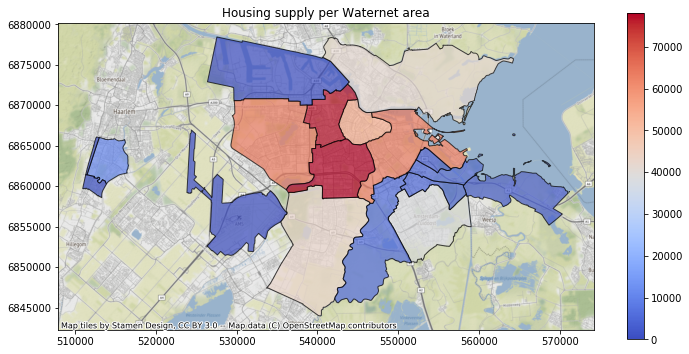

In [121]:
data = scope[['gemeentenaam', 'wijkcode', 'wijknaam', 'woningvoorraad', 'geometry']]
ax = data.plot(column='woningvoorraad', edgecolor='k', cmap='coolwarm', figsize=(12, 12), alpha=0.7, legend=True,\
    legend_kwds={'shrink': 0.5})
ctx.add_basemap(ax, zoom=12)

fig = ax.get_figure()
ax.set_title('Housing supply per Waternet area')
#fig.colorbar(ax, fraction=0.046, pad=0.04)
plt.show()